# Bayesian Linear Regression

Assume we have some $N$ data points $\{(x_1,y_1),\ldots, (x_N,y_N)\}$ and are interested in characterizing the relationship between $x$ and $y$ using an approximate function $\tilde{f}(x)$ of the form
$$
\tilde{f}(x) = \sum_{p=0}^P \beta_p x^p.
$$
Thus, our goal is to characterize the $P$ coefficients $\beta_p$, which we will do in a Bayesian setting.

#### Goals:
By the end of this lab, you should be able to
- Describe the relationship between linear Bayesian inverse problems and standard linear regression.
- Derive the posterior distribution for any linear model with Gaussian prior and additive Gaussian noise.
- Characterize prior and posterior predictive distributions.

#### Formulation:
Let $\beta = [\beta_0,\beta_1,\ldots,\beta_P]$ be the parameter vector of interest.  Our goal is to characterize the Bayesian posterior distribution, whose density $\pi(\beta | y)$ is given by
$$
\pi(\beta | y) = \frac{\pi(y | \beta) \pi(\beta)}{\pi(y)}.
$$
The two major components of this density are the prior density over the coefficeints $\pi(\beta)$ and the likelihood function $\pi(y|\beta)$.  Coming in to this problem, we have very little knowledge about the coefficients $\beta$.  To reflect this, we choose a Gaussian prior with a large variance.  In particular, $\pi(\theta) = N(0,\sigma^I)$ with $\sigma^2 = 100$.   

Constructing the likelihood function is arguably more interesting than the 

Note that the likelihood function $\pi(y|\beta)$ is a probabilistic model for the observations $y=\{y_1,\ldots,y_N\}$.  Thus, forming the 

The observations come from a "true" model $f(x) = \sin(4.5x)$.  



## Imports

In [1]:
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (16.0, 6.0)
matplotlib.rcParams['font.size'] = 16

import numpy as np
import matplotlib.pyplot as plt

from PlotUtilities import PlotGaussianPDF


## Generate Synthetic Observations

In [2]:
def TrueFunc(x):
    return np.sin(4.5*x)

In [3]:
numObs = 20
trueNoiseStd = 2e-2
obsLocs = np.linspace(0,1,numObs)

obsData = TrueFunc(obsLocs) + trueNoiseStd*np.random.randn(numObs)

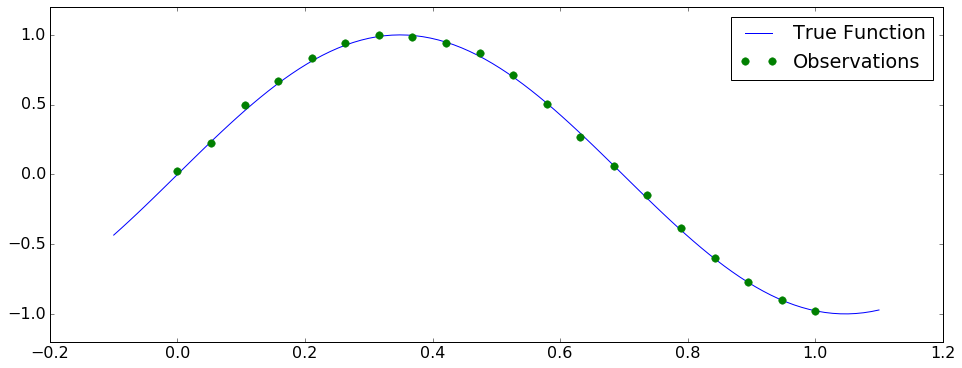

In [4]:
numPlot = 100

plotx = np.linspace(-0.1, 1.1, numPlot)
plt.plot(plotx, TrueFunc(plotx),label='True Function')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Observations')

plt.ylim([-1.2,1.2])
plt.legend()

## Form the polynomial model

In [5]:
polyOrder = 4

V = np.ones((numObs,polyOrder+1))
for p in range(1,polyOrder+1): 
    V[:,p] = np.power(obsLocs, p)

## Form the prior

In [6]:
priorMean = np.zeros(polyOrder+1)
priorCov = (10*10)*np.eye(polyOrder+1)

modelNoiseStd = 1.1*trueNoiseStd
noiseCov = modelNoiseStd * np.eye(numObs)

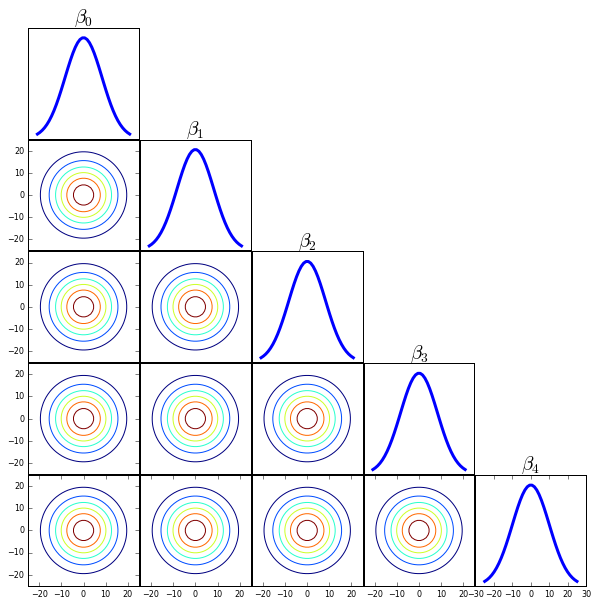

In [7]:
PlotGaussianPDF(priorMean,priorCov)

## Prior predictive

In [8]:
predV = np.ones((numPlot,polyOrder+1))
for p in range(1,polyOrder+1): 
    predV[:,p] = np.power(plotx, p)
    
predMean = np.dot(predV, priorMean)
predCov = np.dot(predV, np.dot(priorCov, predV.T))

predStd = np.sqrt(np.diag(predCov))

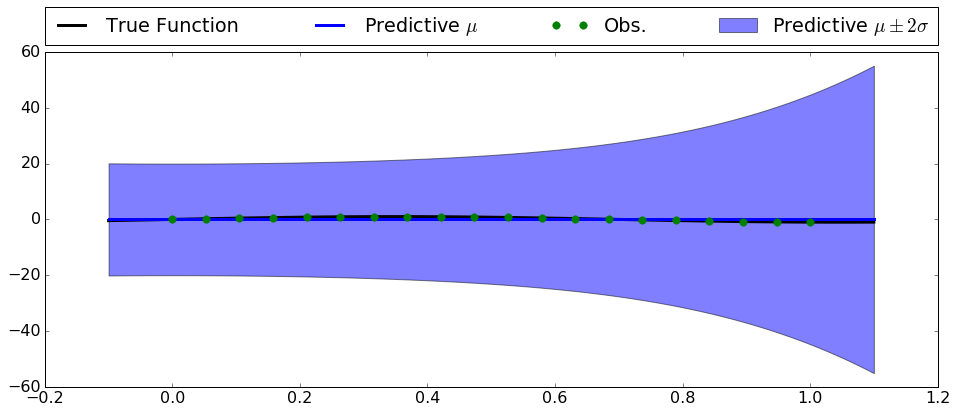

In [9]:
plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx, TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)

## Prior Predictive Samples

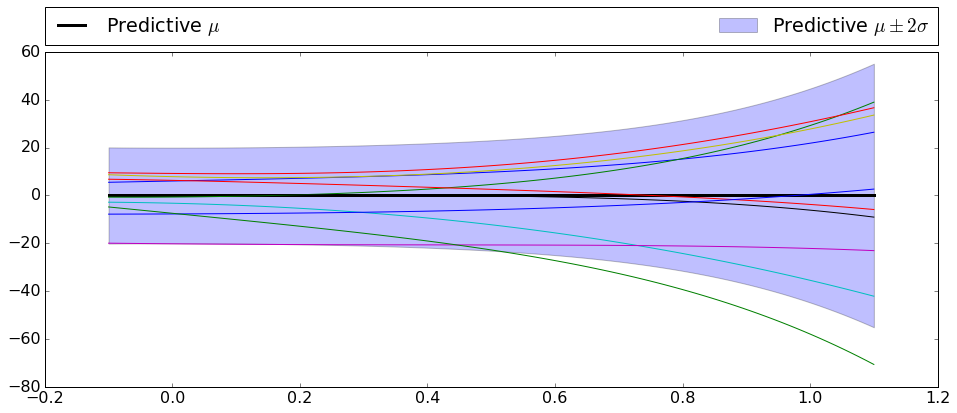

In [10]:
numSamps = 10

L = np.linalg.cholesky(priorCov)
priorSamps = np.tile(priorMean[:,None], (1, numSamps)) + np.dot(L, np.random.randn(polyOrder+1,numSamps))
priorPredSamps = np.dot(predV, priorSamps)


plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.25, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx, predMean, 'k', linewidth=3, label='Predictive $\mu$')

for i in range(numSamps):
    plt.plot(plotx, priorPredSamps[:,i])
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)

## Compute the posterior distribution

In [11]:
Vsigma = np.dot(V,priorCov)
predCov = np.dot(Vsigma, V.T) + noiseCov

postCov = priorCov - np.dot(Vsigma.T, np.linalg.solve(predCov, Vsigma))
postMean = priorMean + np.dot(Vsigma.T, np.linalg.solve(predCov, obsData))

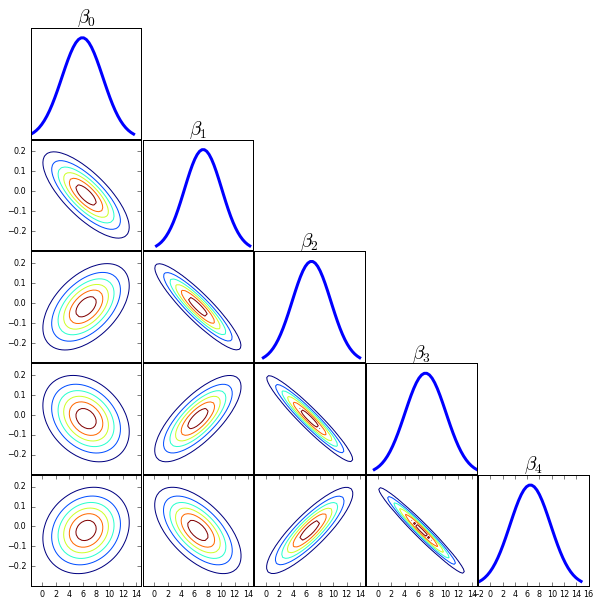

In [12]:
PlotGaussianPDF(postMean,postCov)

## Posterior Predictive

In [13]:
predMean = np.dot(predV, postMean)
predCov = np.dot(predV, np.dot(postCov, predV.T))

predStd = np.sqrt(np.diag(predCov))

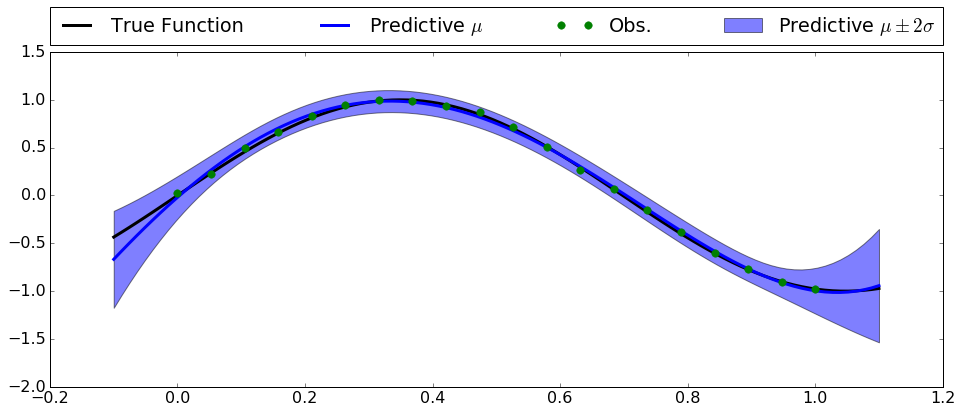

In [14]:
plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx, TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)

## Posterior Predictive Samples

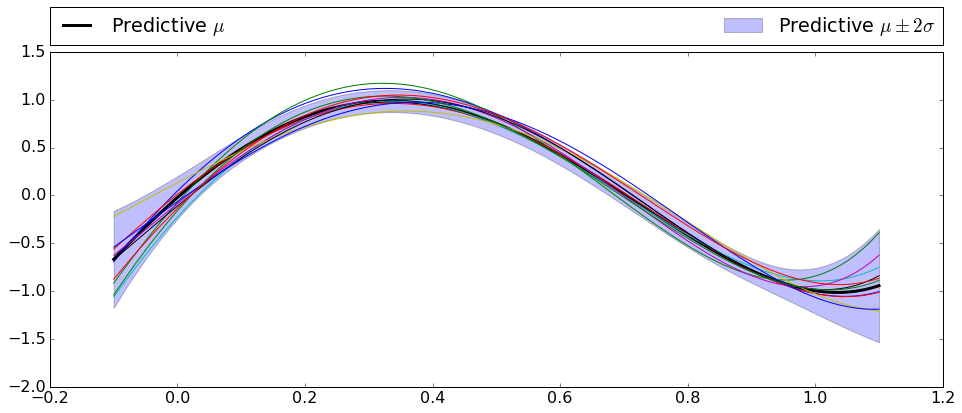

In [15]:
numSamps = 10

L = np.linalg.cholesky(postCov)
postSamps = np.tile(postMean[:,None], (1, numSamps)) + np.dot(L, np.random.randn(polyOrder+1,numSamps))
postPredSamps = np.dot(predV, postSamps)


plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.25, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx, predMean, 'k', linewidth=3, label='Predictive $\mu$')

for i in range(numSamps):
    plt.plot(plotx, postPredSamps[:,i])
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)

# Repeat with MUQ

In [16]:
import pymuqModeling as mm

#### Set up prior

In [17]:
priorMean = np.zeros(polyOrder+1)
priorCov = (10*10)*np.eye(polyOrder+1)

prior = mm.Gaussian(priorMean, priorCov)

#### Compute posterior

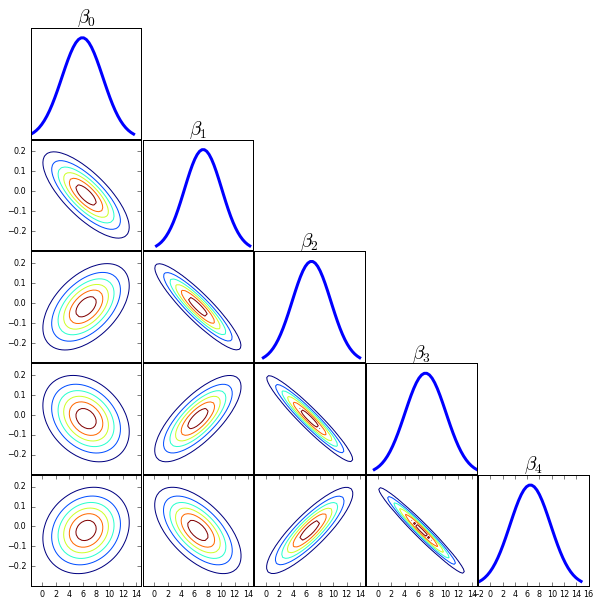

In [19]:
post = prior.Condition(V, obsData, noiseCov)

PlotGaussianPDF(post.GetMean(),post.GetCovariance())